In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [3]:
dataset = pd.read_csv('https://storage.googleapis.com/rg-ai-bootcamp/machine-learning/patients-data.csv')
print(len(dataset))
dataset.head(10)

299


,tumour_size,age,status
0,3.6,50,0
1,6.6,31,1
2,3.3,32,0
3,8.1,21,1
4,3.1,33,0
5,5.6,30,1
6,1.0,26,0
7,5.3,29,1
8,7.6,30,1
9,8.0,34,1


In [4]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 0:2]
y = dataset.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (239, 2) (239,)
Test set: (60, 2) (60,)


In [5]:
k = 11
classifier = KNeighborsClassifier(n_neighbors = k, metric='euclidean').fit(X_train,y_train)
classifier

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [6]:
X_test.head()

,tumour_size,age
206,4.0,22
188,2.8,24
12,5.8,31
219,8.2,29
237,5.1,21


In [7]:
y_hat = classifier.predict(X_test)
y_hat

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [8]:
cm = confusion_matrix(y_test, y_hat)
print (cm)

[[29  0]
 [ 3 28]]


In [9]:
print(f1_score(y_test, y_hat))
print(accuracy_score(y_test, y_hat))

0.9491525423728814
0.95


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict
    classifier = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=classifier.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.93333333, 0.86666667, 0.9       , 0.9       , 0.9       ,
       0.9       , 0.91666667, 0.93333333, 0.96666667, 0.95      ,
       0.95      , 0.95      , 0.93333333, 0.91666667, 0.91666667,
       0.91666667, 0.9       , 0.9       , 0.9       ])

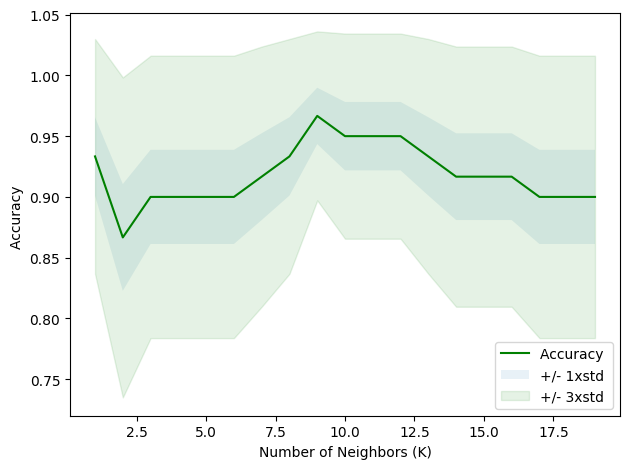

In [12]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [13]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9666666666666667 with k= 9
